<a href="https://colab.research.google.com/github/Biki-ctrl/Diabetes-Disease-Progression-A-Statistical-Analysis./blob/main/Project_4_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Biki Beyene**

#**Overview:**

The objective of this study is to predict the progression of diabetes using quantitative measures one year after baseline. Two statistical models are employed to achieve this goal: linear regression and multiple regression. The independent variables used in the analysis include age, sex, and body mass index (BMI).

Before proceeding with the regression analysis, the correlations between the independent variables were assessed. The linear regression model was used to examine the relationship between BMI and disease progression and to test the hypothesis that no such relationship exists. The hypothesis was either rejected or failed to be rejected based on the evaluation of various performance measures and statistical results.

The multiple regression model was employed when multiple variables were believed to influence the dependent variable. The aim was to determine which variables significantly affect the dependent variable and which do not. The model was evaluated for its performance, and if found to be adequate, the independent variables were plugged into the regression formula to predict the dependent variable.

In summary, this study aimed to predict the progression of diabetes using linear and multiple regression models and to examine the relationship between the independent variables and the dependent variable. The results of this study will contribute to a better understanding of the factors that influence the progression of diabetes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the diabetes dataset that is already scaled
diabetes = datasets.load_diabetes()
type(diabetes)


sklearn.utils.Bunch

#Data:


In [ ]:
#summary of numeric independent variables 

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#EDA:

In [ ]:
#SHAPE
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

    
df.shape

(442, 10)

In [ ]:
#Check for NaNs
df.isnull().sum().any()

False

Text(0, 0.5, 'Probability')

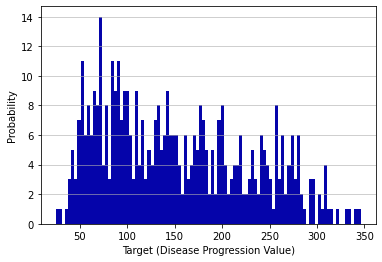

In [ ]:
#histogram of target variable- Disease progression
n, bins, patches = plt.hist(x = diabetes.target, bins = 100, color = '#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')


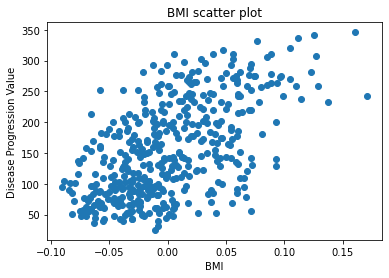

In [ ]:
#scatter plot of BMI
plt.scatter(df.bmi, diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

The scatter plot suggests a positive linear relationship between Body Mass Index (BMI) and the value of disease progression, though this relationship appears to be relatively weak.

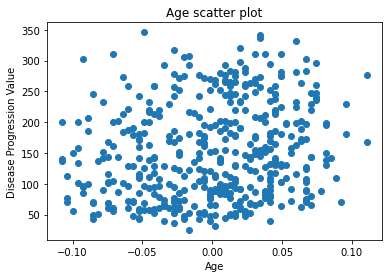

In [ ]:
#scatter plot of age 
plt.scatter(df.age, diabetes.target)

plt.xlabel('Age')
plt.ylabel('Disease Progression Value')
plt.title('Age scatter plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


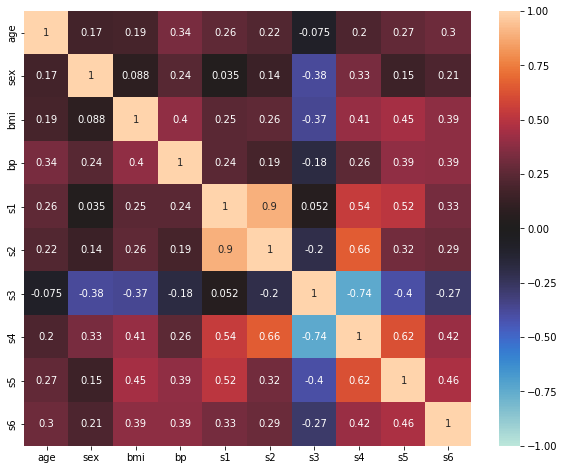

In [ ]:
#corellation matrix
import seaborn as sns
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
fig, ax = plt.subplots(figsize=(10,8))
corrmat = df.corr() # Omit year
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);


The above correlation matrix is a table that shows the strength and direction of the linear relationship between multiple variables. It provides a quick visual representation of how each variable is related to each other variable, making it useful to identify the presence of any linear relationships between variables, determine the strength of those relationships, and uncover any multicollinearity issues. 

The magnitude of the correlation coefficient indicates the strength of the relationship. A coefficient close to 1 or -1 indicates a strong linear relationship, while a coefficient close to 0 indicates a weak or no linear relationship.

#**MODELS:**

Single Linear Regression:

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47
intercept: 152.91886182616167


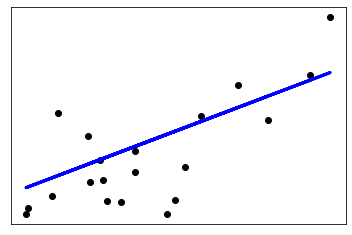

In [ ]:
# single linear regression model 
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

#print intercept
print("intercept:", regr.intercept_)


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

We can see from the above result that 47% of the variance in disease progression is explained by BMI.

In [ ]:
# R squared
print('\nVariance score (R squared): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))



Variance score (R squared): 0.47


Formula: containing the constant term (Intercept) and coeficient.

y =  938.2379X + 152.919


In the case under consideration, the predictor variable utilized is Body Mass Index (BMI). The results obtained reveal a low p-value, indicating the statistical significance of the findings. Furthermore, the coefficient of determination, R-squared, is found to be .47, suggesting that approximately 47% of the variance in the dependent variable is accounted for by the predictor variable, BMI.


In [ ]:
# Additional accuracy measures
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
 
print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )
 
print("\nMean of diabetes target variable = ",diabetes_y_test.mean())
 
print("RMSE percentage of diabetes mean = ", \
      100 * np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred))/diabetes_y_test.mean())
 


Mean squared error: 2548.07
Root mean squared error: 50.48

Mean of diabetes target variable =  126.2
RMSE percentage of diabetes mean =  39.998759894526835


Mean Squared Error (MSE) is a measure of the discrepancy between the observed and predicted values, represented as the average of the squared differences. A low MSE value is desirable, as it implies that a high proportion of the variability in the data can be accounted for by the model.

The results obtained in this analysis are indicative of a significant p-value and a satisfactory coefficient of determination (R-squared) value, suggesting that the model presents a strong fit to the data.

**Multiple Regression:**

In [ ]:
#multiple regression 
import statsmodels.api as sm

diabetes_X = diabetes.data
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))
 
# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
# get feature names
colnames = np.asarray(df.columns)

 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl
 

#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm = sm.OLS(diabetes_y_train, X_train).fit()
lm.summary()

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
<class 'numpy.ndarray'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           4.64e-58
Time:                        02:48:04   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.000     147.539     157.990
x1             0.3035     61.286      0.005      0.996    -120.169     120.776
x2          -237.6393     62.837     -3.782      0.000    -361.162    -114.117
x3           510.5306     68.156      7.491      0.000     376.553     644.508
x4           327.7370     66.876      4.901      0.000     196.275     459.199
x5          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
x6           492.8146    344.227      1.432      0.153    -183.850    1169.480
x7           102.8485    219.463      0.469      0.640    -328.561     534.258
x8           184.6065    167.336      1.103      0.271    -144.334     513.547
x9           743.5196    175.359      4.240      0.000     398.807    1088.232
x10           76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results above are from an Ordinary Least Squares (OLS) regression analysis, which is a type of linear regression that models the relationship between one dependent variable (y) and one or more independent variables (x1, x2, ... x10).

The coefficients section of the result shows the estimated coefficients for each independent variable in the model. The coefficients are used to calculate the predicted value of the dependent variable based on the values of the independent variables.

The R-squared value of 0.512 indicates that 51.2% of the variability in the dependent variable can be explained by the independent variables in the model. The adjusted R-squared takes into account the number of independent variables in the model, and the value of 0.500 indicates that 50% of the variability can be explained while accounting for the number of variables.

The F-statistic and its associated p-value provide a test of the overall significance of the model. A low p-value (in this case, 4.64e-58) indicates that the model is significant.





In [ ]:
#multiple regression model


df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = lm.params[1:])
df_var = pd.DataFrame( data = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"])
df_p = pd.DataFrame( data = lm.pvalues[1:])
df_tbl =  pd.concat ( [df_var, df_col, df_coef, df_p] , axis = 1 )
df_tbl.columns = [' Model Variable', 'Variable Name', 'Coefficients', 'P-Value']
df_tbl



,Model Variable,Variable Name,Coefficients,P-Value
0,x1,age,0.303500,9.960511e-01
1,x2,sex,-237.639315,1.787768e-04
2,x3,bmi,510.530605,4.230966e-13
3,x4,bp,327.736980,1.376978e-06
4,x5,s1,-814.131709,5.555949e-02
5,x6,s2,492.814588,1.530022e-01
6,x7,s3,102.848452,6.395776e-01
7,x8,s4,184.606489,2.705814e-01
8,x9,s5,743.519617,2.763327e-05
9,x10,s6,76.095172,2.658265e-01


Formula:

0.3035X1- 237.64X2+ 510.5X3 + .....76.09X10 +  152.764


x1-x10 variables and their corresponding coefficients.


We have variables with P-values greater than 0.05, that indicates there is no significant relationship with the target variable for those select independent variables. We would want to drop the variables with P-values greater than .05 and see how our model would perform.



In [ ]:
# Convert to a dataframe 
df_diabetes_X_train = pd.DataFrame(diabetes_X_train)
df_diabetes_X_train.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]


# Bases on the summary, I need to remove x1, x5, x6, x7, x8,x10
columns_to_keep = ["x2", "x3", "x4", "x9"]
df_diabetes_X_train = df_diabetes_X_train[columns_to_keep]

diabetes_X_train = df_diabetes_X_train[:-20]
diabetes_X_test = df_diabetes_X_train[-20:]


# Use the .values method of data frame to get rows in array form 
X_train = df_diabetes_X_train.values

# Add constant
X_train = sm.add_constant(X_train)

# Fit new model
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     96.12
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           6.96e-58
Time:                        02:48:05   Log-Likelihood:                -2294.7
No. Observations:                 422   AIC:                             4599.
Df Residuals:                     417   BIC:                             4620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8790      2.725     56.112      0.000     147.523     158.235
x1          -131.8626     58.938     -2.237      0.026    -247.715     -16.011
x2           593.1621     65.915      8.999      0.000     463.595     722.729
x3           298.1175     65.412      4.558      0.000     169.540     426.695
x4           547.0556     65.697      8.327      0.000     417.916     676.195
==============================================================================
Omnibus:                        5.134   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.979
Skew:                           0.123   Prob(JB):                        0.137
Kurtosis:                       2.593   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

formula = -131.86.(sex) + 593.516(BMI) + 298.11(bP)+ 547.1(s5) +152.8

#conclusion:

In conclusion, after evaluating multiple regression models, the second model was found to be the most suitable for predicting diabetes disease progression. This was determined by its high R squared value and the absence of predictor variables with insignificant P-values. The results indicate that the selected predictor variables (Sex, BMI, BP, and S5) significantly contribute to the explanation of the target variable, while the remaining variables were found to have no statistically significant relationship. 

The coefficient values of each predictor variable reveal the magnitude and direction of their effect on the target variable, allowing us to make predictions using the regression formula. This analysis supports the conclusion that there are meaningful relationships between the predictor variables and diabetes disease progression, providing valuable insights into the underlying mechanisms of the disease


